In [1]:
import numpy as np
from typing import Tuple
import matplotlib.pyplot as plt
import re
from scipy.spatial import distance_matrix

In [2]:
from util import load_data

In [3]:
stopwords = ["a", "an", "the", "is", "to", "for", "in", "of", "and", "on", '']

In [4]:
X,vocab = load_data('data/cnnhealth.txt', stopwords)

Importing data...


/opt/anaconda3/envs/tf/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3213: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).shape[axis]


X has 4061 examples and 13685 features in BOW format...


In [8]:
def distance1(x1,x2):
    """
    nonlocal, normalized edit distance
    """
    return np.sum(np.abs(x1-x2))/(np.sum(x1)+np.sum(x2))

def distance2(x1,x2):
    """
    Euclidean distance
    """
    return np.sqrt(np.sum(np.power((x1-x2), 2)))

In [12]:
def create_distance_matrix(X:np.ndarray, distance_type=1) -> np.ndarray:
    assert distance_type in (1,2)
    '''
    return distance_matrix(X,X, p=distance_type, threshold=1000000)
    if distance_type == 1:
        return np.linalg.norm(X[:, None, :] - X[None, :, :], axis=-1, ord=1)
    else:
        return np.linalg.norm(X[:, None, :] - X[None, :, :], axis=-1, ord=2)
    '''
    if distance_type == 1:
        distance_measure = distance1
    else:
        distance_measure = distance2
    m,n = np.shape(X)
    distance_matrix = np.zeros(shape=(m,m))
    for i in range(m):
        print(str(i/m), end='\r')
        for j in range(i):
            distance_matrix[i,j] = distance_measure(X[i],X[j])
            distance_matrix[j,i] = distance_matrix[i,j]
    return distance_matrix

In [13]:
distance_matrix_1 = create_distance_matrix(X,distance_type=1)

In [14]:
distance_matrix_2 = create_distance_matrix(X,distance_type=2)

In [15]:
with open('distance_matrices.npy', 'wb') as file:
    np.save(file, distance_matrix_1)
    np.save(file, distance_matrix_2)

In [ ]:
with open('distance_matrices.npy', 'rb') as file:
    distance_matrix_1 = np.load(file)
    distance_matrix_2 = np.save(file)

In [20]:
distance_matrix_1[6,0]

0.9285714285714286

In [21]:
distance_matrix_1.shape

(4061, 4061)

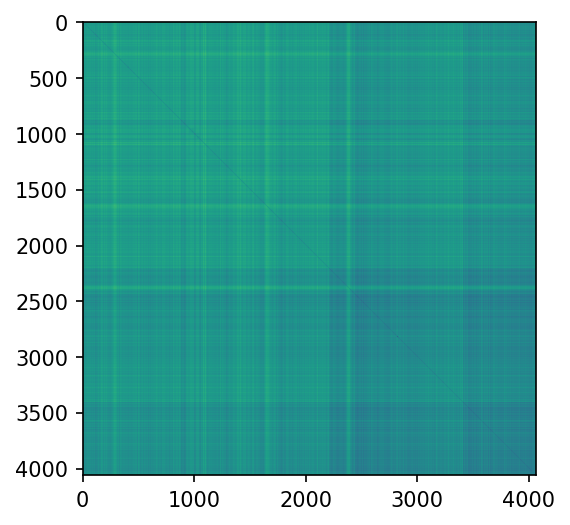

In [28]:
plt.figure(dpi=150)
plt.imshow(distance_matrix_2)

In [25]:
def generate_statistics(X,vocab):
    print("Dataset Statistics:")
    m,n = np.shape(X)
    num_words = int(np.sum(X))
    print("# Number of Tweets: {}".format(m))
    print("# Number of Words (Total): {}".format(num_words))
    print("# Number of Tokens: {}".format(n))
    print("# Average Number of Words per Tweet: {}".format(round((num_words/m),3)))
    print("# Top 5 Legal Tokens: {}".format(vocab[np.flip(np.argsort(np.sum(X, axis=0)))[0:5]]))

In [26]:
generate_statistics(X,vocab)

Dataset Statistics:
# Number of Tweets: 4061
# Number of Words (Total): 48233
# Number of Tokens: 13685
# Average Number of Words per Tweet: 11.877
# Top 5 Legal Tokens: ['you' 'rt' 'your' 'are' 'this']
